In [ ]:
"""method = "IndLinReg(r^2,std)" + "-" + str(window)
reset_portfolio_metrics(method)

# Store individual models for each stock
for stock in all_stocks:
    for i in range(train_start, train_end, forecast_horizon):
        # Append squared returns and variance of returns to A and B respectively
        avg_vix = float(vix_data[i - window: i].mean().iloc[0])

        features = list(returns_df[stock][i - window:i] ** 2) + [avg_vix] + [returns_df[stock][i - 7 : i].std()] + [returns_df[stock][i - 14 : i].std()] + [returns_df[stock][i - 21 : i].std()]
        
        # Sada dodaj tu listu kao jedan element u A
        A.append(features)
        B.append(returns_df[stock][i:i + forecast_horizon].std())

    methods[method][stock + "model"] = get_linear_regression_model(A, B, False)

plt.figure(figsize=(20, 6))
for stock in all_stocks:
    if all(methods[method][stock + "model"].coef_ < 1):
        plt.plot(methods[method][stock + "model"].coef_) 
plt.title(method + " Weights")
plt.show()

for i in range(test_start, test_end, forecast_horizon):
    for stock in all_stocks:
        avg_vix = float(vix_data[i - window: i].mean().iloc[0])
        # Grupiraj kvadrirane povrate i prosječni VIX u jednu listu prije dodavanja u A
        features = list(returns_df[stock][i - window:i] ** 2) + [avg_vix] + [returns_df[stock][i - 7 : i].std()] + [returns_df[stock][i - 14 : i].std()] + [returns_df[stock][i - 21 : i].std()]
        
        features = np.array(features).reshape(1, -1)
        #  Trying to predict the volatility of the next forecast_horizon days
        volatility[stock] = methods[method][stock + "model"].predict(features)
            
    
    gather_portfolio_metrics(method, i, volatility)"""


"""method = "LinReg(log(1+r),log(var))" + "-" + str(window)
reset_portfolio_metrics(method)

# Iterate over each window of returns
for stock in training_stocks:
    for i in range(train_start, train_end, forecast_horizon):
        variance = returns_df[stock][i:i + forecast_horizon].var()
        if variance > 0: # If variance is 0, we cannot take the log
            avg_vix = float(vix_data[i - window: i].mean().iloc[0])
            # Grupiraj kvadrirane povrate i prosječni VIX u jednu listu prije dodavanja u A
            features = list(np.log(1 + returns_df[stock][i - window:i])) + [avg_vix] + [returns_df[stock][i - 7 : i].std()] + [returns_df[stock][i - 14 : i].std()] + [returns_df[stock][i - 21 : i].std()]
            
            # Sada dodaj tu listu kao jedan element u A
            A.append(features)
            B.append(np.log(variance))

methods[method]["model"] = get_linear_regression_model(A, B)

plt.figure(figsize=(20, 6))
plt.plot(methods[method]["model"].coef_)
plt.title(method + " Weights")
plt.show()

volatility = {}

for i in range(test_start, test_end, forecast_horizon):
    for stock in all_stocks:
        avg_vix = float(vix_data[i - window: i].mean().iloc[0])
        # Grupiraj kvadrirane povrate i prosječni VIX u jednu listu prije dodavanja u A
        features = list(np.log(1 + returns_df[stock][i - window:i])) + [avg_vix] + [returns_df[stock][i - 7 : i].std()] + [returns_df[stock][i - 14 : i].std()] + [returns_df[stock][i - 21 : i].std()]
        
        features = np.array(features).reshape(1, -1)
        #  Trying to predict the volatility of the next forecast_horizon days
        volatility[stock] = np.exp(methods[method]["model"].predict(features))**0.5
            
    
    gather_portfolio_metrics(method, i, volatility)"""


"""method = "IndLinReg(log(1+r),log(var))" + "-" + str(window)
reset_portfolio_metrics(method)

# Store individual models for each stock
for stock in all_stocks:
    for i in range(train_start, train_end, forecast_horizon):
        # Append squared returns and variance of returns to A and B respectively
        avg_vix = float(vix_data[i - window: i].mean().iloc[0])

        features = list(np.log(1 + returns_df[stock][i - window:i])) + [avg_vix] + [returns_df[stock][i - 7 : i].std()] + [returns_df[stock][i - 14 : i].std()] + [returns_df[stock][i - 21 : i].std()]
        
        # Sada dodaj tu listu kao jedan element u A
        A.append(features)
        B.append(returns_df[stock][i:i + forecast_horizon].std())

    methods[method][stock + "model"] = get_linear_regression_model(A, B, False)

plt.figure(figsize=(20, 6))
for stock in all_stocks:
    if all(methods[method][stock + "model"].coef_ < 1):
        plt.plot(methods[method][stock + "model"].coef_) 
plt.title(method + " Weights")
plt.show()

for i in range(test_start, test_end, forecast_horizon):
    for stock in all_stocks:
        avg_vix = float(vix_data[i - window: i].mean().iloc[0])
        # Grupiraj kvadrirane povrate i prosječni VIX u jednu listu prije dodavanja u A
        features = list(np.log(1 + returns_df[stock][i - window:i])) + [avg_vix] + [returns_df[stock][i - 7 : i].std()] + [returns_df[stock][i - 14 : i].std()] + [returns_df[stock][i - 21 : i].std()]
        
        features = np.array(features).reshape(1, -1)
        #  Trying to predict the volatility of the next forecast_horizon days
        volatility[stock] = np.exp(methods[method][stock + "model"].predict(features))**0.5
            
    
    gather_portfolio_metrics(method, i, volatility)"""

"""method = "LinReg(r^2,var)" + "-" + str(window)
reset_portfolio_metrics(method)

A, B = [], []
# Iterate over each window of returns
for stock in training_stocks:
    for i in range(train_start, train_end, forecast_horizon):
        avg_vix = float(vix_data[i - window: i].mean().iloc[0])
        # Grupiraj kvadrirane povrate i prosječni VIX u jednu listu prije dodavanja u A
        features = list(returns_df[stock][i - window:i] ** 2) + [avg_vix] + [returns_df[stock][i - 7 : i].std()] + [returns_df[stock][i - 14 : i].std()] + [returns_df[stock][i - 21 : i].std()]
        
        # Sada dodaj tu listu kao jedan element u A
        A.append(features)
        B.append(returns_df[stock][i:i + forecast_horizon].var())


methods[method]["model"] = get_linear_regression_model(A, B, False) 
# Intercept might make variance negative

plt.figure(figsize=(25, 6))
plt.plot(methods[method]["model"].coef_)
plt.title(method + " Weights")
plt.show()

volatility = {}

for i in range(test_start, test_end, forecast_horizon):
    for stock in all_stocks:
        avg_vix = float(vix_data[i - window: i].mean().iloc[0])
        # Grupiraj kvadrirane povrate i prosječni VIX u jednu listu prije dodavanja u A
        features = list(returns_df[stock][i - window:i] ** 2) + [avg_vix] + [returns_df[stock][i - 7 : i].std()] + [returns_df[stock][i - 14 : i].std()] + [returns_df[stock][i - 21 : i].std()]
        
        features = np.array(features).reshape(1, -1)
        #  Trying to predict the volatility of the next forecast_horizon days
        volatility[stock] = methods[method]["model"].predict(features)**0.5
            
    
    gather_portfolio_metrics(method, i, volatility)"""

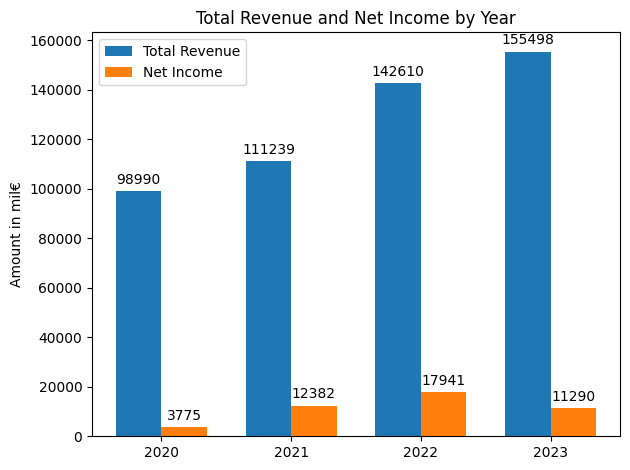

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Podaci
years = ['2020', '2021', '2022', '2023']
total_revenue = [98990, 111239, 142610, 155498]
net_income = [3775, 12382, 17941, 11290]

x = np.arange(len(years))  # label lokacije
width = 0.35  # širina stupaca

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, total_revenue, width, label='Total Revenue')
rects2 = ax.bar(x + width/2, net_income, width, label='Net Income')

# Dodavanje naslova i oznaka
ax.set_ylabel('Amount in mil€')
ax.set_title('Total Revenue and Net Income by Year')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

# Funkcija za dodavanje oznaka iznad stupaca
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


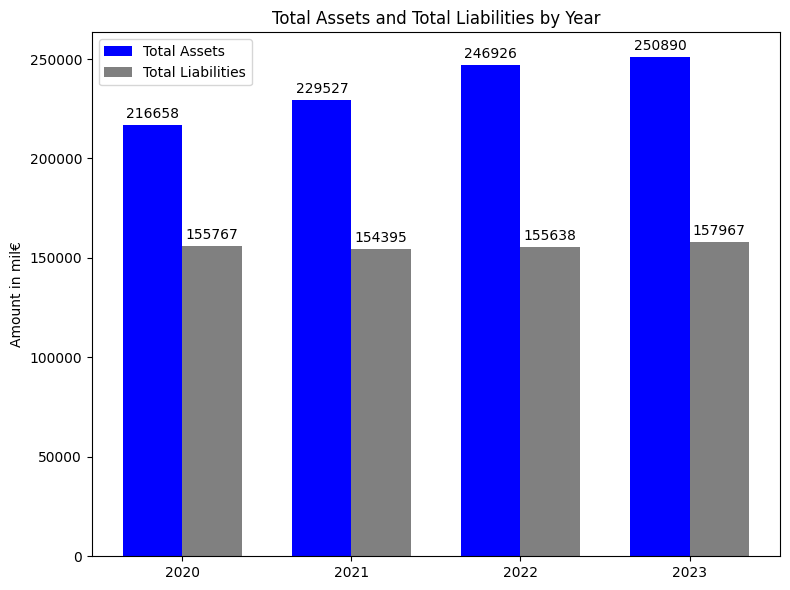

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Podaci
years = ['2020', '2021', '2022', '2023']
total_assets = [216658, 229527, 246926, 250890]
total_liabilities = [155767, 154395, 155638, 157967]

x = np.arange(len(years))  # label lokacije
width = 0.35  # širina stupaca

fig, ax = plt.subplots(figsize=(8, 6))  # Postavite veličinu na 10x6 inča (širina x visina)
rects1 = ax.bar(x - width/2, total_assets, width, label='Total Assets', color='blue')
rects2 = ax.bar(x + width/2, total_liabilities, width, label='Total Liabilities', color='gray')

# Dodavanje naslova i oznaka
ax.set_ylabel('Amount in mil€')
ax.set_title('Total Assets and Total Liabilities by Year')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

# Funkcija za dodavanje oznaka iznad stupaca
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
